In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv(r'C:\Users\ΙΩΑΝΝΑ\Downloads\FB.csv')

#print the head
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
1,2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2,2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
3,2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
4,2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


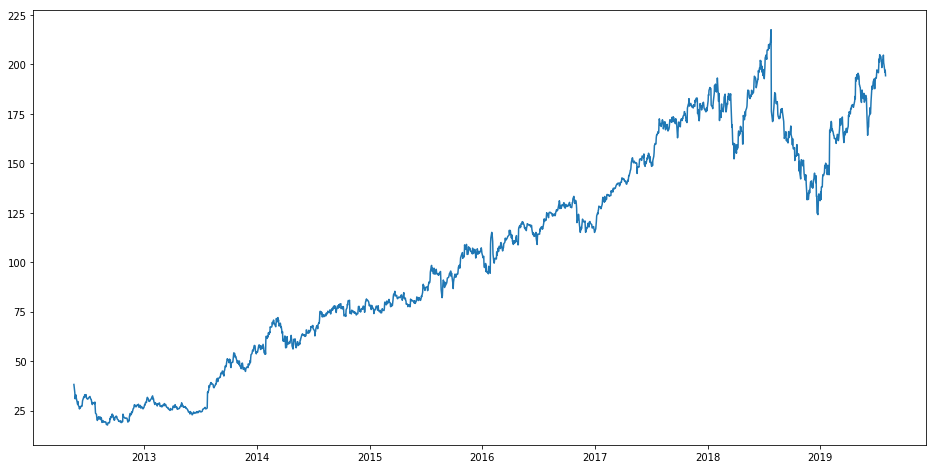

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plotting the target variable
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]
    
new_data.head()

,Date,Close
0,2012-05-18 00:00:00,38.23
1,2012-05-21 00:00:00,34.03
2,2012-05-22 00:00:00,31
3,2012-05-23 00:00:00,32
4,2012-05-24 00:00:00,33.03


In [5]:
#splitting into train and validation
###replace 100 with the row value of the dataset that meets the 80-20 splitting in train and test
train = new_data[:1490]
valid = new_data[1490:]

In [6]:
new_data.shape, train.shape, valid.shape

((1811, 2), (1490, 2), (321, 2))

In [7]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2012-05-18 00:00:00'),
 Timestamp('2018-04-20 00:00:00'),
 Timestamp('2018-04-23 00:00:00'),
 Timestamp('2019-07-31 00:00:00'))

In [8]:
#make predictions
###replace 25 with the valid.shape value from above
preds = []
for i in range(0,321):
    a = train['Close'][len(train)-321+i:].sum() + sum(preds)
    b = a/321
    preds.append(b)

    
#RESULTS

#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

22.3359403767041

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


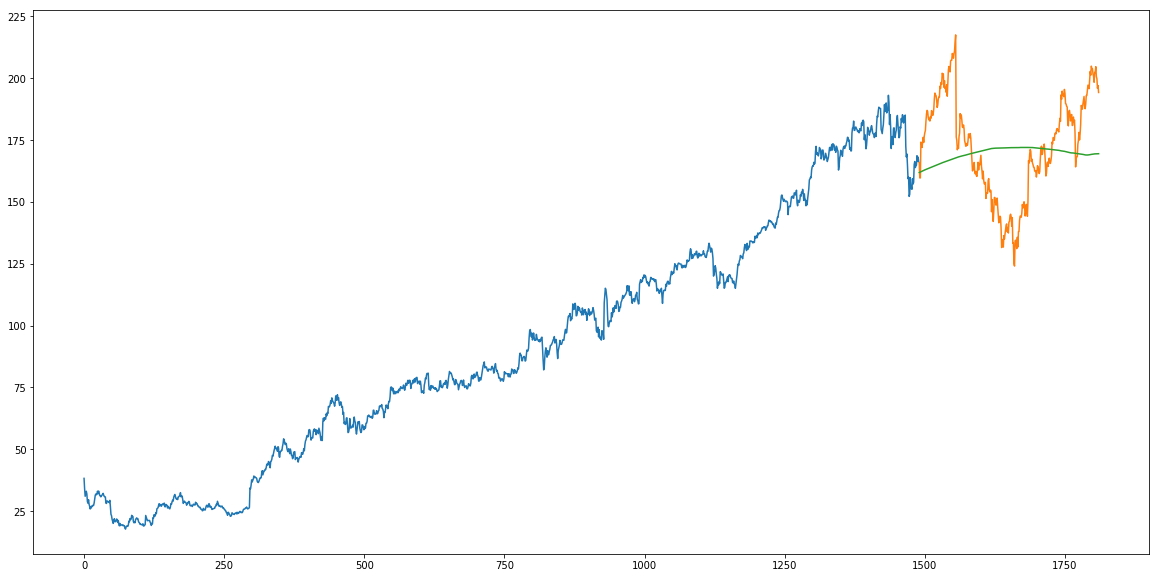

In [9]:
#plotting results
#obviously not a good prediction 
#Inference :The predicted values are of the same range as the observed values in the train set 
#there is an increasing trend initially and then a slow decrease

valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [10]:
#Auto ARIMA
#replace 100 as above
### in anacoda propmt type "pip install pmdarima"


from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:1490]
valid = data[1490:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=321)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5793.982, BIC=5820.471, Fit time=10.276 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6837.906, BIC=6848.501, Fit time=0.110 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6375.892, BIC=6397.083, Fit time=1.204 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5803.178, BIC=5824.369, Fit time=2.962 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5792.243, BIC=5824.030, Fit time=6.799 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=6324.021, BIC=6350.510, Fit time=6.916 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5795.835, BIC=5832.919, Fit time=29.619 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6763.317, BIC=6784.508, Fit time=2.346 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=5794.061, BIC=5836.443, Fit time=26.389 seconds
Fit ARIMA: order=(0, 1, 1

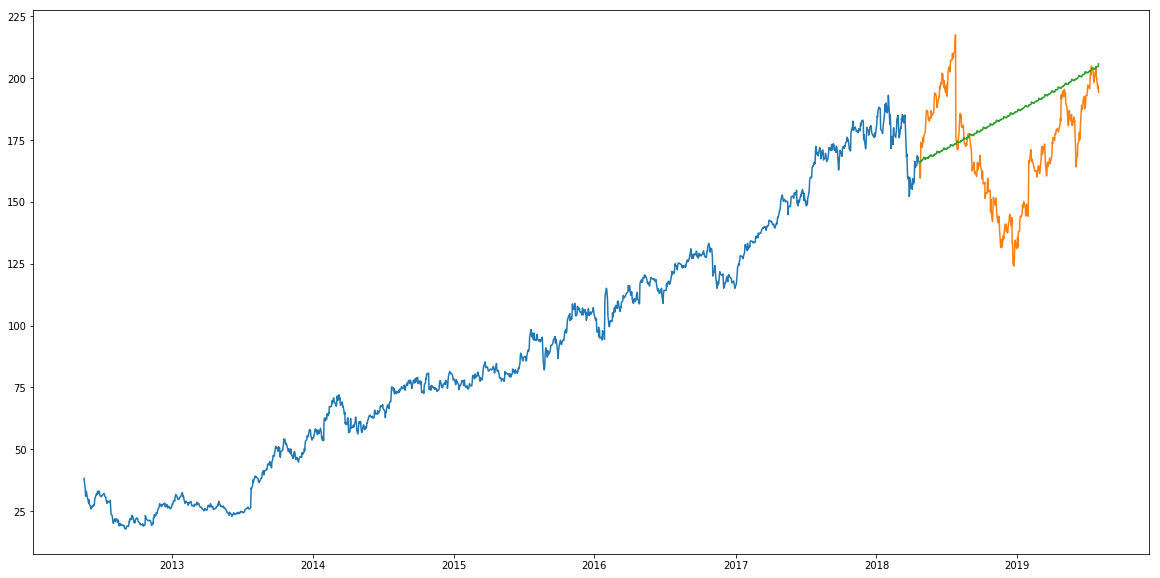

In [11]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [14]:
#Long Short Term Memory (LSTM) with one input (only historical prices)

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1490,:]
valid = dataset[1490:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 321 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Train on 1430 samples
1430/1430 - 44s - loss: 0.0019


In [15]:
##Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms


7.504481697085105

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


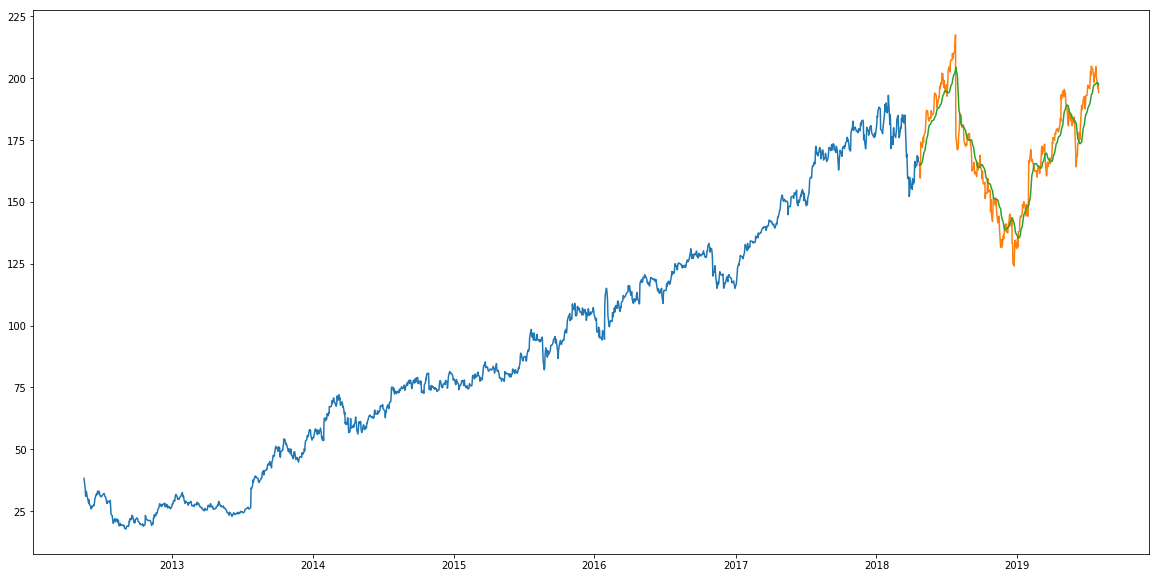

In [17]:
#for plotting
train = new_data[:1490]
valid = new_data[1490:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
#####LAB02 KERAS FEED FORWARD FOR MODEL EVALUATION 

